In [6]:
# Download the original data
# http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat
import requests

url = r'http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat'
r = requests.get(url, stream=True)

with open('aus_credit.dat','w') as f:
    f.write(r.text)

In [11]:
# Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

raw = pd.read_csv('aus_credit.dat', sep= ' ', header=None)
raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [13]:
features = {i:'A'+str(i+1) for i in range(15)}
features

{0: 'A1',
 1: 'A2',
 2: 'A3',
 3: 'A4',
 4: 'A5',
 5: 'A6',
 6: 'A7',
 7: 'A8',
 8: 'A9',
 9: 'A10',
 10: 'A11',
 11: 'A12',
 12: 'A13',
 13: 'A14',
 14: 'A15'}

In [17]:
raw.rename(columns=features, inplace=True)
raw.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [18]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
A1     690 non-null int64
A2     690 non-null float64
A3     690 non-null float64
A4     690 non-null int64
A5     690 non-null int64
A6     690 non-null int64
A7     690 non-null float64
A8     690 non-null int64
A9     690 non-null int64
A10    690 non-null int64
A11    690 non-null int64
A12    690 non-null int64
A13    690 non-null int64
A14    690 non-null int64
A15    690 non-null int64
dtypes: float64(3), int64(12)
memory usage: 80.9 KB


In [19]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,690.0,0.678261,0.467482,0.00,0.000,1.000,1.0000,1.00
A2,690.0,31.568203,11.853273,13.75,22.670,28.625,37.7075,80.25
A3,690.0,4.758725,4.978163,0.00,1.000,2.750,7.2075,28.00
A4,690.0,1.766667,0.430063,1.00,2.000,2.000,2.0000,3.00
A5,690.0,7.372464,3.683265,1.00,4.000,8.000,10.0000,14.00
A6,690.0,4.692754,1.992316,1.00,4.000,4.000,5.0000,9.00
A7,690.0,2.223406,3.346513,0.00,0.165,1.000,2.6250,28.50
A8,690.0,0.523188,0.499824,0.00,0.000,1.000,1.0000,1.00
A9,690.0,0.427536,0.495080,0.00,0.000,0.000,1.0000,1.00
A10,690.0,2.400000,4.862940,0.00,0.000,0.000,3.0000,67.00


There are 6 numerical and 8 categorical attributes. The labels have been changed for the convenience of the statistical algorithms. For example, attribute 4 originally had 3 labels p,g,gg and these have been changed to labels 1,2,3. 

A1: 0,1 CATEGORICAL (formerly: a,b) 
A2: continuous. 
A3: continuous. 
A4: 1,2,3 CATEGORICAL (formerly: p,g,gg) 
A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x) 
A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z) 
A7: continuous. 
A8: 1, 0 CATEGORICAL (formerly: t, f) 
A9: 1, 0	CATEGORICAL (formerly: t, f) 
A10: continuous. 
A11: 1, 0	CATEGORICAL (formerly t, f) 
A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p) 
A13: continuous. 
A14: continuous. 
A15: 1,2 class attribute (formerly: +,-)

In [21]:
raw.A2.mean(),raw.A2.std()
(raw.A2-raw.A2.mean())/raw.A2.std()

0     -0.800471
1     -0.750696
2     -0.167735
3     -0.835061
4     -0.961608
5     -1.327752
6     -1.193612
7      2.286440
8     -0.315373
9      2.040095
10     0.162976
11     0.831146
12    -0.919426
13     0.282774
14     2.278847
15     1.393016
16    -0.167735
17    -1.067064
18    -0.975950
19    -0.771787
20    -0.286689
21    -1.045973
22     0.810055
23     0.844644
24    -1.018133
25     0.099702
26    -0.765038
27     0.135135
28    -0.075777
29    -0.716106
         ...   
660   -0.413236
661   -0.765038
662    0.704598
663   -0.463012
664   -0.975950
665    0.000152
666   -0.406487
667   -0.560875
668    0.057520
669   -1.172520
670    0.521527
671   -0.750696
672   -1.151429
673   -0.603057
674   -0.490852
675   -0.455419
676   -0.743947
677   -0.722855
678   -0.497601
679    1.435198
680   -0.877243
681    0.310614
682   -0.729605
683    1.400609
684    0.964442
685    0.000152
686   -0.919426
687   -1.074657
688   -0.349963
689    0.795712
Name: A2, Length: 690, d

In [25]:
# standardize continuous A2,A3,A7,A10,A13,A14
col_std = ['A2','A3','A7','A10','A13','A14']
for col in col_std:
    raw[col] = (raw[col]-raw[col].mean())/raw[col].std() 

In [26]:
raw.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,-0.800471,1.346134,2,4,4,-0.190767,0,0,-0.493529,1,2,-0.488004,0.037353,0
1,0,-0.750696,0.450221,2,8,4,-0.615090,0,0,-0.493529,0,2,-0.139490,-0.195272,0
2,0,-0.167735,-0.604384,1,4,4,-0.290872,0,0,-0.493529,1,2,0.557539,-0.195272,0
3,0,-0.835061,1.354169,1,5,3,-0.664395,1,1,1.768477,1,2,-1.068862,-0.195272,1
4,1,-0.961608,0.685248,2,6,4,-0.078711,1,1,2.385388,0,2,-0.720347,-0.164946,1


In [27]:
def make_dummy(X,features):
    for fe in features:
        X = pd.concat([X, pd.get_dummies(X[fe], prefix=fe, drop_first=True)],axis=1)
    X.drop(features, axis=1, inplace=True)
    return X

In [28]:
col_dummy = ['A4','A5','A6','A12']
data = make_dummy(raw, col_dummy)
data.head()

,A1,A2,A3,A7,A8,A9,A10,A11,A13,A14,...,A5_14,A6_2,A6_3,A6_4,A6_5,A6_7,A6_8,A6_9,A12_2,A12_3
0,1,-0.800471,1.346134,-0.190767,0,0,-0.493529,1,-0.488004,0.037353,...,0,0,0,1,0,0,0,0,1,0
1,0,-0.750696,0.450221,-0.615090,0,0,-0.493529,0,-0.139490,-0.195272,...,0,0,0,1,0,0,0,0,1,0
2,0,-0.167735,-0.604384,-0.290872,0,0,-0.493529,1,0.557539,-0.195272,...,0,0,0,1,0,0,0,0,1,0
3,0,-0.835061,1.354169,-0.664395,1,1,1.768477,1,-1.068862,-0.195272,...,0,0,1,0,0,0,0,0,1,0
4,1,-0.961608,0.685248,-0.078711,1,1,2.385388,0,-0.720347,-0.164946,...,0,0,0,1,0,0,0,0,1,0


In [29]:
data.columns

Index(['A1', 'A2', 'A3', 'A7', 'A8', 'A9', 'A10', 'A11', 'A13', 'A14', 'A15',
       'A4_2', 'A4_3', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8',
       'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A6_2', 'A6_3',
       'A6_4', 'A6_5', 'A6_7', 'A6_8', 'A6_9', 'A12_2', 'A12_3'],
      dtype='object')

In [30]:
X = data.drop(['A15'], axis=1)
y = data.A15
X.shape,y.shape

((690, 34), (690,))

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [35]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

<module 'matplotlib.pyplot' from '/root/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

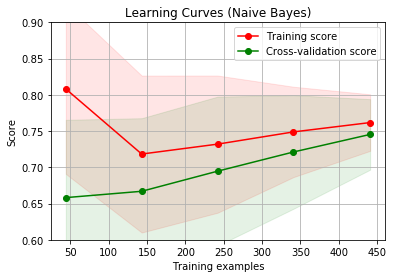

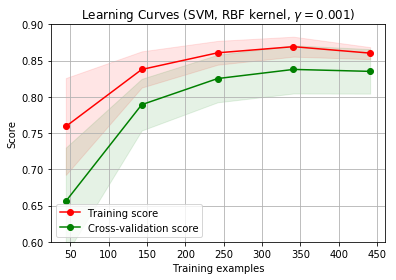

In [44]:
from sklearn.model_selection import ShuffleSplit


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_tr, y_tr, ylim=(0.6, 0.9), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.01)
plot_learning_curve(estimator, title, X_tr, y_tr, (0.6, 0.9), cv=cv, n_jobs=4)

/root/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/

training SGD
training ASGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


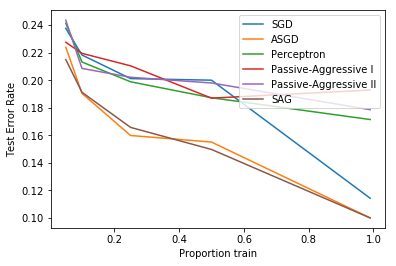

In [40]:
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20

classifiers = [
    ("SGD", SGDClassifier()),
    ("ASGD", SGDClassifier(average=True)),
    ("Perceptron", Perceptron()),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0)),
    ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
]

xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")

/root/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


<module 'matplotlib.pyplot' from '/root/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

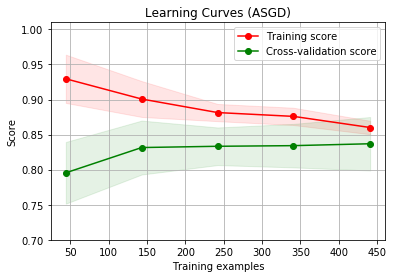

In [43]:
title = "Learning Curves (ASGD)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SGDClassifier(average=True)
plot_learning_curve(estimator, title, X_tr, y_tr, (0.7, 1.01), cv=cv, n_jobs=4)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-2],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_tr, y_tr)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_te, clf.predict(X_te)
    print(classification_report(y_true, y_pred))
    print()
    print('acc:{}'.format(accuracy_score(y_true, y_pred)))

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.803 (+/-0.053) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.845 (+/-0.063) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.853 (+/-0.081) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.854 (+/-0.088) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.856 (+/-0.084) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.835 (+/-0.075) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.851 (+/-0.069) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.815 (+/-0.056) for {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.852 (+/-0.074) for {'C': 1, 'kernel': 'linear'}
0.844 (+/-0.069) for {'C': 10, 'kernel': 'linear'}
0.842 (+/-0.070) for {'C': 100, 'kernel': 'linear'}
0.842 (+/-0.070) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the f

In [53]:
# continue tuning {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.5e-3, 1e-3, 5e-3],
                     'C': [25, 50, 100, 75, 150]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_tr, y_tr)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_te, clf.predict(X_te)
    print(classification_report(y_true, y_pred))
    print()
    print('acc:{}'.format(accuracy_score(y_true, y_pred)))

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 25, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.856 (+/-0.084) for {'C': 25, 'gamma': 0.0005, 'kernel': 'rbf'}
0.858 (+/-0.089) for {'C': 25, 'gamma': 0.001, 'kernel': 'rbf'}
0.856 (+/-0.084) for {'C': 25, 'gamma': 0.005, 'kernel': 'rbf'}
0.858 (+/-0.089) for {'C': 50, 'gamma': 0.0005, 'kernel': 'rbf'}
0.858 (+/-0.089) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.852 (+/-0.077) for {'C': 50, 'gamma': 0.005, 'kernel': 'rbf'}
0.858 (+/-0.089) for {'C': 100, 'gamma': 0.0005, 'kernel': 'rbf'}
0.856 (+/-0.084) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.842 (+/-0.059) for {'C': 100, 'gamma': 0.005, 'kernel': 'rbf'}
0.858 (+/-0.089) for {'C': 75, 'gamma': 0.0005, 'kernel': 'rbf'}
0.858 (+/-0.089) for {'C': 75, 'gamma': 0.001, 'kernel': 'rbf'}
0.849 (+/-0.068) for {'C': 75, 'gamma': 0.005, 'kernel': 'rbf'}
0.858 (+/-0.089) for {'C': 150, 'gamma': 0.0005, 'kernel': '

In [54]:
# continue tuning {'C': 25, 'gamma': 0.001, 'kernel': 'rbf'}
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.5e-3, 1e-3, 5e-3],
                     'C': [10,25,30]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_tr, y_tr)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_te, clf.predict(X_te)
    print(classification_report(y_true, y_pred))
    print()
    print('acc:{}'.format(accuracy_score(y_true, y_pred)))

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 25, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.845 (+/-0.068) for {'C': 10, 'gamma': 0.0005, 'kernel': 'rbf'}
0.853 (+/-0.081) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.856 (+/-0.084) for {'C': 10, 'gamma': 0.005, 'kernel': 'rbf'}
0.856 (+/-0.084) for {'C': 25, 'gamma': 0.0005, 'kernel': 'rbf'}
0.858 (+/-0.089) for {'C': 25, 'gamma': 0.001, 'kernel': 'rbf'}
0.856 (+/-0.084) for {'C': 25, 'gamma': 0.005, 'kernel': 'rbf'}
0.858 (+/-0.089) for {'C': 30, 'gamma': 0.0005, 'kernel': 'rbf'}
0.858 (+/-0.089) for {'C': 30, 'gamma': 0.001, 'kernel': 'rbf'}
0.853 (+/-0.082) for {'C': 30, 'gamma': 0.005, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.99      0.83      0.90        81
          1 